torch.Size([256, 256])


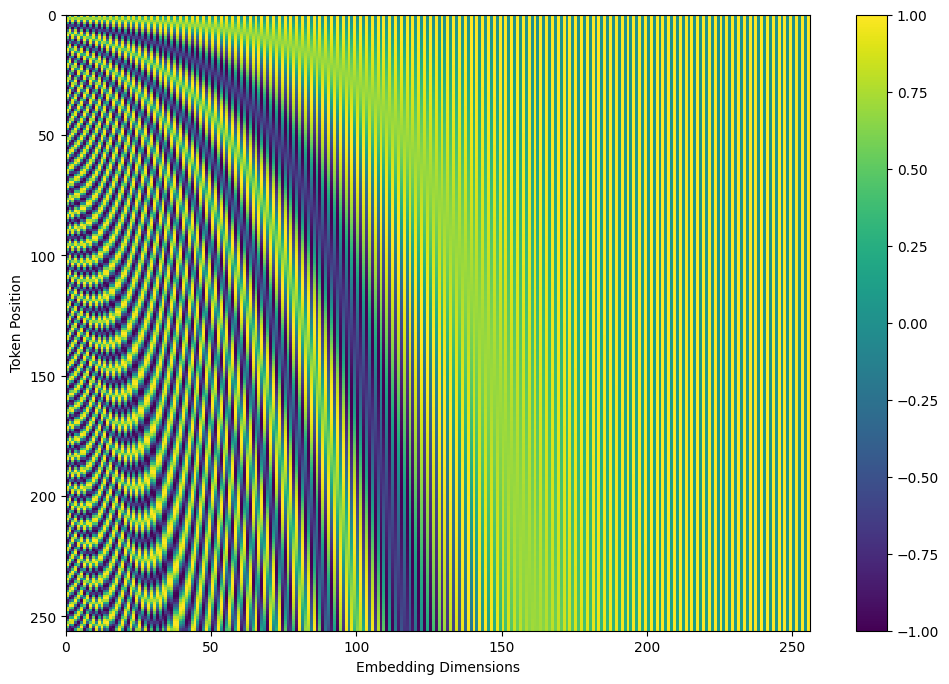

In [1]:
import torch
import matplotlib.pyplot as plt
import Project_Model.Libs.Embedder as Embedder

TOKENS = 256
DIMENSIONS = 256

# Custom code made by Christian Risi and Giuseppe Gassi
TENSOR = Embedder.fixed_positional_encoding(TOKENS, DIMENSIONS)
# print(TENSOR)


# Code taken from
#   https://github.com/jalammar/jalammar.github.io/blob/master/notebookes/transformer/transformer_positional_encoding_graph.ipynb
#   to test for correctness of custom code
print (TENSOR.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(TENSOR, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, DIMENSIONS))
plt.ylim((TOKENS,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

[7706, 290, 756, 4270, 7357, 115, 351, 1507, 1213, 410, 3382, 317, 497, 4740, 2784, 7700]
16
torch.Size([16, 256])
tensor([[ 0.9070,  0.6699,  0.2960,  ...,  0.3870,  0.8941,  1.3026],
        [-0.9618, -1.9069,  1.6814,  ...,  0.0977,  0.0829,  2.6063],
        [ 0.8923,  0.2553,  1.9925,  ...,  1.8682, -0.1530,  0.7194],
        ...,
        [ 0.7546,  1.0222, -0.7065,  ...,  4.0476,  0.5369,  1.5168],
        [ 1.4984,  0.9595,  0.5984,  ...,  0.7721, -0.6914,  1.1631],
        [ 1.2913, -1.0850,  2.0208,  ...,  0.1654,  0.9178,  0.5116]],
       grad_fn=<AddBackward0>)


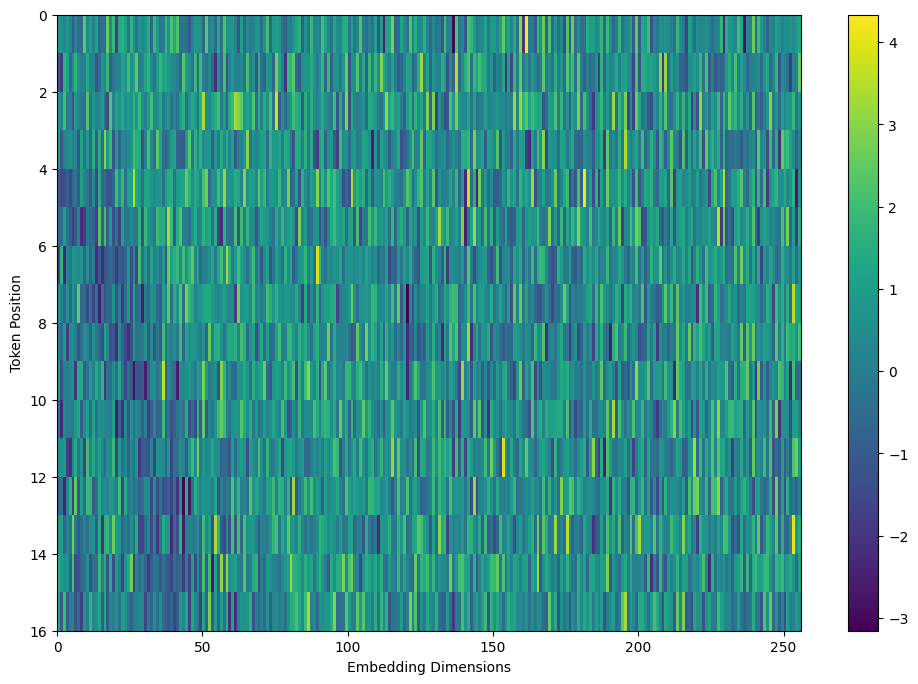

In [2]:
from pathlib import Path
import Project_Model.Libs.BPE as BPE

TEXT = "<ABS>The Dark Knight is a 2008 superhero film directed by Christopher Nolan,<SOTL>"

VOCABULARY_PATH = Path("Assets/Model/toy_10/toy_dictionary.json")
SPECIAL_VOC = BPE.default_special_tokens()

VOCABULARY = BPE.load_nanos_vocabulary(VOCABULARY_PATH)
TOKENANO = BPE.TokeNanoCore(
    VOCABULARY,
    SPECIAL_VOC
)

TOKENIZATION = TOKENANO.encode(TEXT)
print(TOKENIZATION)

TOKEN_SPACE_SIZE = TOKENANO.vocabulary_size
EMBEDDED_SIZE = 256

EMBEDDER = Embedder.NanoSocratesEmbedder(TOKEN_SPACE_SIZE, EMBEDDED_SIZE)
TENSOR: torch.Tensor = EMBEDDER(TOKENIZATION)
print(len(TOKENIZATION))
print(TENSOR.shape)

print(TENSOR)

TOKENS, DIMENSIONS = TENSOR.shape

plt.figure(figsize=(12,8))
plt.pcolormesh(TENSOR.detach().numpy(), cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, DIMENSIONS))
plt.ylim((TOKENS,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()
